In [1]:
from psyrun.io import load_dict_h5
from scikits import bootstrap
import scipy

%matplotlib inline

# Load data

In [5]:
df = pd.concat([pd.DataFrame(load_dict_h5('../data/result0.h5')), pd.DataFrame(load_dict_h5('../data/result1.h5'))])

In [6]:
grouped = df.groupby(['word2vec', 'timetags', 'preinit', 'coref', 'roles', 'shift'])

In [7]:
grouped.mean()

n_epochs  post_test_acc  \
word2vec timetags preinit coref roles shift                            
False    False    False   False False 0.00         20       0.298287   
                                True  0.00         20       0.303519   
                          True  False 0.00         20       0.252685   
                                True  0.00         20       0.260602   
                  True    False False 0.00         20       0.300417   
         True     False   False False 0.05         20       0.285648   
                                      0.10         20       0.286343   
                                      0.20         20       0.297546   
                                      0.40         20       0.287685   
                                      1.00         20       0.291944   
True     False    False   False False 0.00         20       0.276204   
                                True  0.00         20       0.282917   
                          True  False 0.00         20       0.263102   
                                True  0.00         20       0.263750   
                  True    False False 0.00         20       0.264815   
         True     False   False False 0.05         20       0.280602   
                                      0.10         20       0.277500   
                                      0.20         20       0.278333   
                                      0.40         20       0.283287   
                                      1.00         20       0.287546   

                                             post_train_acc  pre_test_acc  \
word2vec timetags preinit coref roles shift                                 
False    False    False   False False 0.00         0.956804      0.259306   
                                True  0.00         0.972947      0.253889   
                          True  False 0.00         0.982850      0.253611   
                                True  0.00         0.979469      0.253750   
                  True    False False 0.00         0.861473      0.397500   
         True     False   False False 0.05         0.980556      0.262685   
                                      0.10         0.979831      0.244537   
                                      0.20         0.982246      0.253796   
                                      0.40         0.980918      0.247778   
                                      1.00         0.954630      0.256111   
True     False    False   False False 0.00         0.903140      0.251667   
                                True  0.00         0.891224      0.254259   
                          True  False 0.00         0.980757      0.249120   
                                True  0.00         0.979106      0.255787   
                  True    False False 0.00         0.611715      0.312222   
         True     False   False False 0.05         0.923631      0.249954   
                                      0.10         0.905072      0.252546   
                                      0.20         0.951369      0.259954   
                                      0.40         0.902415      0.252454   
                                      1.00         0.897182      0.250139   

                                             pre_train_acc      trial  
word2vec timetags preinit coref roles shift                            
False    False    False   False False 0.00        0.256884  14.500000  
                                True  0.00        0.268156  14.500000  
                          True  False 0.00        0.251127  14.500000  
                                True  0.00        0.257649  14.500000  
                  True    False False 0.00        0.392794  14.500000  
         True     False   False False 0.05        0.263647  14.500000  
                                      0.10        0.256643  14.500000  
                                      0.20        0.256200  14.500000  
                                      0.40   

# Plotting

In [8]:
sns.set('paper')

In [9]:
def get_condition_identifier(row):
    active = []
    if row['coref']:
        active.append('coref')
    if row['roles']:
        active.append('roles')
    if len(active) <= 0:
        active.append('baseline')
    return ' + '.join(active)

In [27]:
def add_chance_level(ax=None, significance=0.35):
    if ax is None:
        ax = plt.gca()
    ax.axhline(0.25, color='0.26')
    ax.axhline(significance, color='0.26', linestyle='--')

In [10]:
df['Features'] = df.apply(get_condition_identifier, axis=1)
df['Memory embedding'] = df.apply(lambda x: 'word2vec' if x['word2vec'] else 'HRR', axis=1)

In [22]:
df2 = pd.melt(df.query('coref == False and roles == False and timetags == False and preinit == True'),
    id_vars=['Memory embedding', 'trial', 'preinit'],
    value_vars=['post_test_acc', 'post_train_acc', 'pre_test_acc', 'pre_train_acc'])
df2['pre'] = df2.apply(lambda x: 'Untrained' if x['variable'].startswith('pre') else 'Trained', axis=1)
df2['errortype'] = df2.apply(lambda x: 'training' if 'train' in x['variable'] else 'test', axis=1)

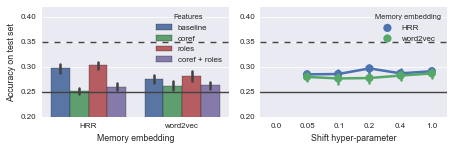

In [48]:
plt.figure(figsize=(6.4, 2.2))

plt.subplot(1, 2, 1)
sns.barplot(
    'Memory embedding', 'post_test_acc', 'Features',
    data=df.query('timetags == False and preinit == False'),
    order=['HRR', 'word2vec'],
    hue_order=['baseline', 'coref', 'roles', 'coref + roles'])
add_chance_level()
plt.ylim(.2, 0.42)
plt.ylabel('Accuracy on test set')

plt.subplot(1, 2, 2)
sns.pointplot(
    'shift', 'post_test_acc', 'Memory embedding',
    data=df.query('timetags == True'),
    order=sorted(df['shift'].unique()))
add_chance_level()
plt.ylim(.2, 0.42)
plt.xlabel('Shift hyper-parameter')
plt.ylabel('')

plt.tight_layout()
plt.savefig('../../stat946-report/results1.pdf')

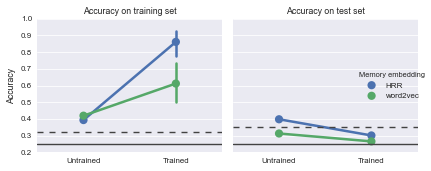

In [76]:
g = sns.factorplot(
    'pre', 'value', 'Memory embedding', col='errortype',
    data=df2,
    order=['Untrained', 'Trained'], col_order=['training', 'test'], hue_order=['HRR', 'word2vec'],
    size=2.5, aspect=1)
g.set_titles("Accuracy on {col_name} set").set_xlabels('').set_ylabels('Accuracy')
for name, ax in zip(g.col_names, g.axes[0]):
    if name == 'training':
        add_chance_level(ax, .32)
    else:
        add_chance_level(ax)
        
plt.tight_layout()
plt.savefig('../../stat946-report/results2.pdf')

# Best 500

In [2]:
best500 = pd.DataFrame(load_dict_h5('../data/best500.h5'))

In [3]:
best500.mean()

coref              0.000000
n_epochs          20.000000
post_test_acc      0.305741
post_train_acc     0.783707
pre_test_acc       0.255426
pre_train_acc      0.261373
preinit            0.000000
roles              1.000000
shift              0.200000
timetags           1.000000
trial             14.500000
word2vec           0.000000
dtype: float64

In [4]:
bootstrap.ci(best500['post_test_acc'])

array([ 0.2945    ,  0.31185185])

# Notrain500

In [71]:
notrain500 = pd.DataFrame(load_dict_h5('../data/notrain500.h5'))

In [72]:
notrain500.mean()

coref             0.000000
pre_test_acc      0.364000
pre_train_acc     0.375673
preinit           1.000000
roles             0.000000
timetags          0.000000
trial            14.500000
word2vec          0.000000
dtype: float64

In [75]:
bootstrap.ci(notrain500['pre_test_acc'])

array([ 0.35768519,  0.37092593])